# Experiments

In [1]:
import sys; sys.path.insert(0,"../")


import mview

To run consistent experiments, we'll want to be careful in the experimental setup, parameter choices, and stopping criteria.

For the setup, I suggest trying to recover 3D positions from 2D images (our usual test), where the 3D positions and projection matrices are randomly determined. This makes to vary not only the number of data points, but also the number of projections (as opposed to always using the 3 random projections).

Caveat: this makes running multiple experiments per case more important, since there can be variability in the success of mview.bisic() based on how close the projection matrices happen to be from each other (e.g., in some experiments the projection matrices may be very different, in some other close to each other).

The only stopping criterion that (mostly) makes sense in comparing results for different number of nodes $N$ and number of perspectives $K$ is the normalized MPSE MDS stress function. We should then fix a target minimum cost value, so that the GD scheme knows when to start. A small value such as min_cost=1e-4 will guarantee that mview.basic() has found the global minima.

That being said, many times the algorithm will find a non-global minima. That doesn't mean it is a bad solution, it may still have placed most nodes correctly, and only misplaced a few nodes (as you can see in plots of solutions in other notebooks). In this case, the cost will converge to some nonzero number. We need a good way to still quantify the quality of the embedding on these cases.

Since a global minima will not always be found, we need other stopping criteria. A minimum gradient size (the root-mean-square of the entries in the estimated gradient) and a maximum number of iterations would guarantee that the GD scheme stops in a reasonable amount of time. A minimum gradient size of min_grad=1e-6 and maximum iterations max_iter=300 seems to do the job (well, the maximum number of iterations may have to depend on the node size and average neighbors)

Then there are two parameters that are not yet fully optimized:

The amount of stochasticity, given by average_neighbors, the average number of neighbors per node used in each iteration when estimating cost and gradients. Even a value of average_number=4 seems to do well (the smaller the value, the faster each iteration is completed). Hopefully we can just keep that number fixed (for small node numbers I've seen a higher number do better, but for large node numbers it seems that we can push stochasticity to its limits).

The other parameter is the initial learning rate. As of now, it seems to do mostly fine for these type of experiments, but I still need to figure out a way to assign a good value in general. The algorithm is adaptive, so it learns a good learning rate as it goes on, but of course starting in the right ball park reduces time (I will try to change the initialization to avoid sharp changes that happen whenever the initial learning rate is too large).

In [2]:
# Fixed parameters:
min_cost = 1e-4 #minimum cost stoppint criteria
max_iter = 300 #maximum number of iterations
min_grad = 1e-6 #early stopping criterion: end if gradient is small
average_neighbors = 4 #average number of neighbors per node
lr = 1.0 #initial learning rate

Here are some examples of the experiments, along with plots of the results and computation history to see how well the experiment went:

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 8.37e-01
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-04
    min_grad : 1.00e-06
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 6.95e-04, grad = 7.04e-03, cost = 1.16e-03, lr = 1.37e-01
  results:
    conclusion : maximum number of iterations reached
    total iterations : 299
    final cost : 1.19e-03
    time : 1.11e+01 [sec]
  Final stress : 1.50e-03


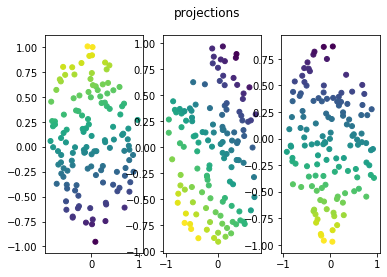

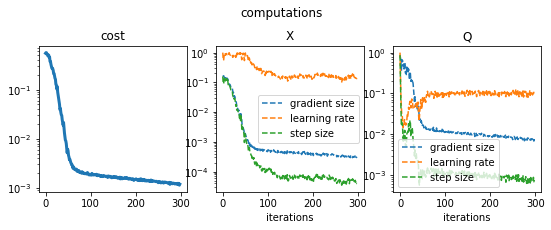

In [3]:
DD = {
    'nodes' : 128,
    'attributes' : 3
}
mv = mview.basic(DD, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)
mv.figureY()
mv.figureH()

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 5
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 1.35e+00
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-04
    min_grad : 1.00e-06
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 5.26e-05, grad = 6.60e-04, cost = 1.05e-04, lr = 1.95e-01
  results:
    conclusion : minimum cost reached
    total iterations : 104
    final cost : 1.05e-04
    time : 6.25e+00 [sec]
  Final stress : 2.06e-04


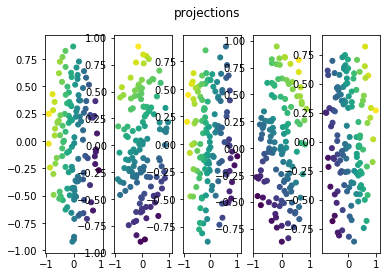

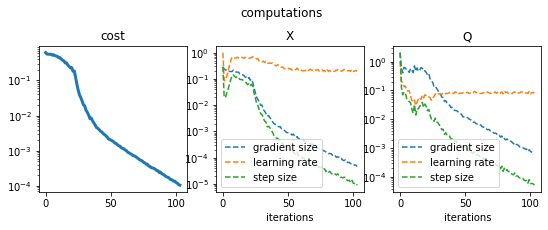

In [4]:
DD = {
    'nodes' : 128,
    'attributes' : 5
}
mv = mview.basic(DD, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)
mv.figureY()
mv.figureH()

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 1024
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 8.23e-01
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-04
    min_grad : 1.00e-06
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 5.21e-05, grad = 2.05e-03, cost = 1.03e-04, lr = 7.32e-01
  results:
    conclusion : minimum cost reached
    total iterations : 172
    final cost : 1.03e-04
    time : 4.72e+01 [sec]
  Final stress : 1.26e-04


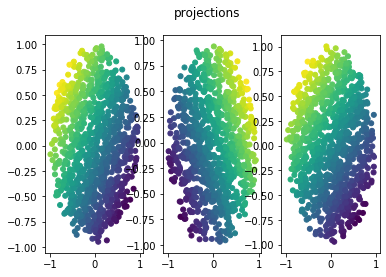

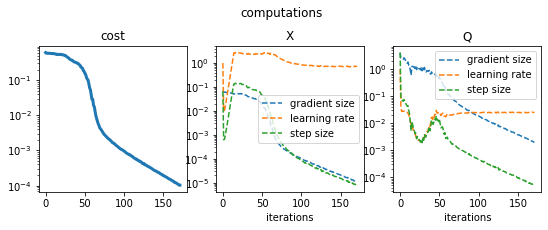

In [5]:
DD = {
    'nodes' : 1024,
    'attributes' : 3
}
mv = mview.basic(DD, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)
mv.figureY()
mv.figureH()

## Experiments repeating the same true coordinates

Suppose you want to run this experiment repeatedly, for a fixed number of nodes but varying number of projections, and you want to use the same true coordinates in each experiment.

The easy way to do this using only mview.basic(), so that you don't have to get into the details of the MPSE class yet, is to just define the true coordinates beforehand and use these when specifying the dissimilarities that you'll be using.

The true data could be any array, for example, randomly generated coordinates:

In [6]:
N = 128
X_true = np.random.randn(N,3)

To run an experiment using this array as the true array, do the following:

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 2.08e+00
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-04
    min_grad : 1.00e-06
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 1.33e-04, grad = 2.71e-03, cost = 2.21e-04, lr = 3.38e-01
  results:
    conclusion : maximum number of iterations reached
    total iterations : 299
    final cost : 2.17e-04
    time : 1.11e+01 [sec]
  Final stress : 6.02e-04


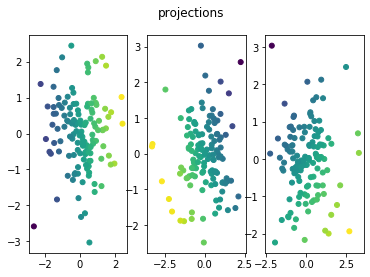

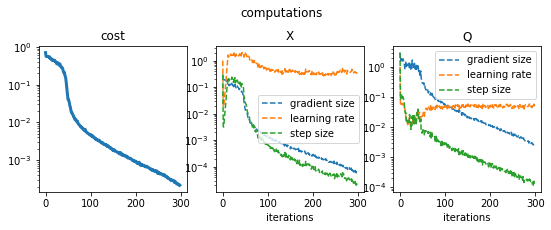

In [7]:
DD = {
    'nodes' : N,
    'attributes' : 3,
    'X' : X_true #this is the additional line to specify the true coordinates
}
mv = mview.basic(DD, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)
mv.figureY()
mv.figureH()

You can keep using the same true coordinates for other experiments:

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 5
    number of points : 128
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 3.48e+00
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-04
    min_grad : 1.00e-06
    max_iter : 300
    max_step : 1.00e+04
  progress:
300 : step = 5.36e-05, grad = 1.26e-03, cost = 1.01e-04, lr = 3.94e-01
  results:
    conclusion : minimum cost reached
    total iterations : 183
    final cost : 1.01e-04
    time : 1.09e+01 [sec]
  Final stress : 4.78e-04


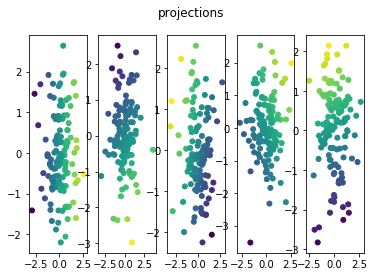

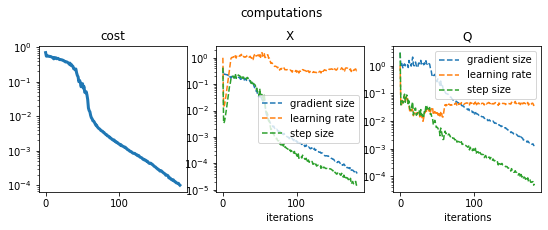

In [8]:
DD = {
    'nodes' : N,
    'attributes' : 5,
    'X' : X_true #this is the additional line to specify the true coordinates
}
mv = mview.basic(DD, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)
mv.figureY()
mv.figureH()

I have confirmed that it is indeed using the same true coordinates each time (but I should add a line or two in the verbose so that this is apparent).